In [ ]:
# 原先的称为批量梯度下降法

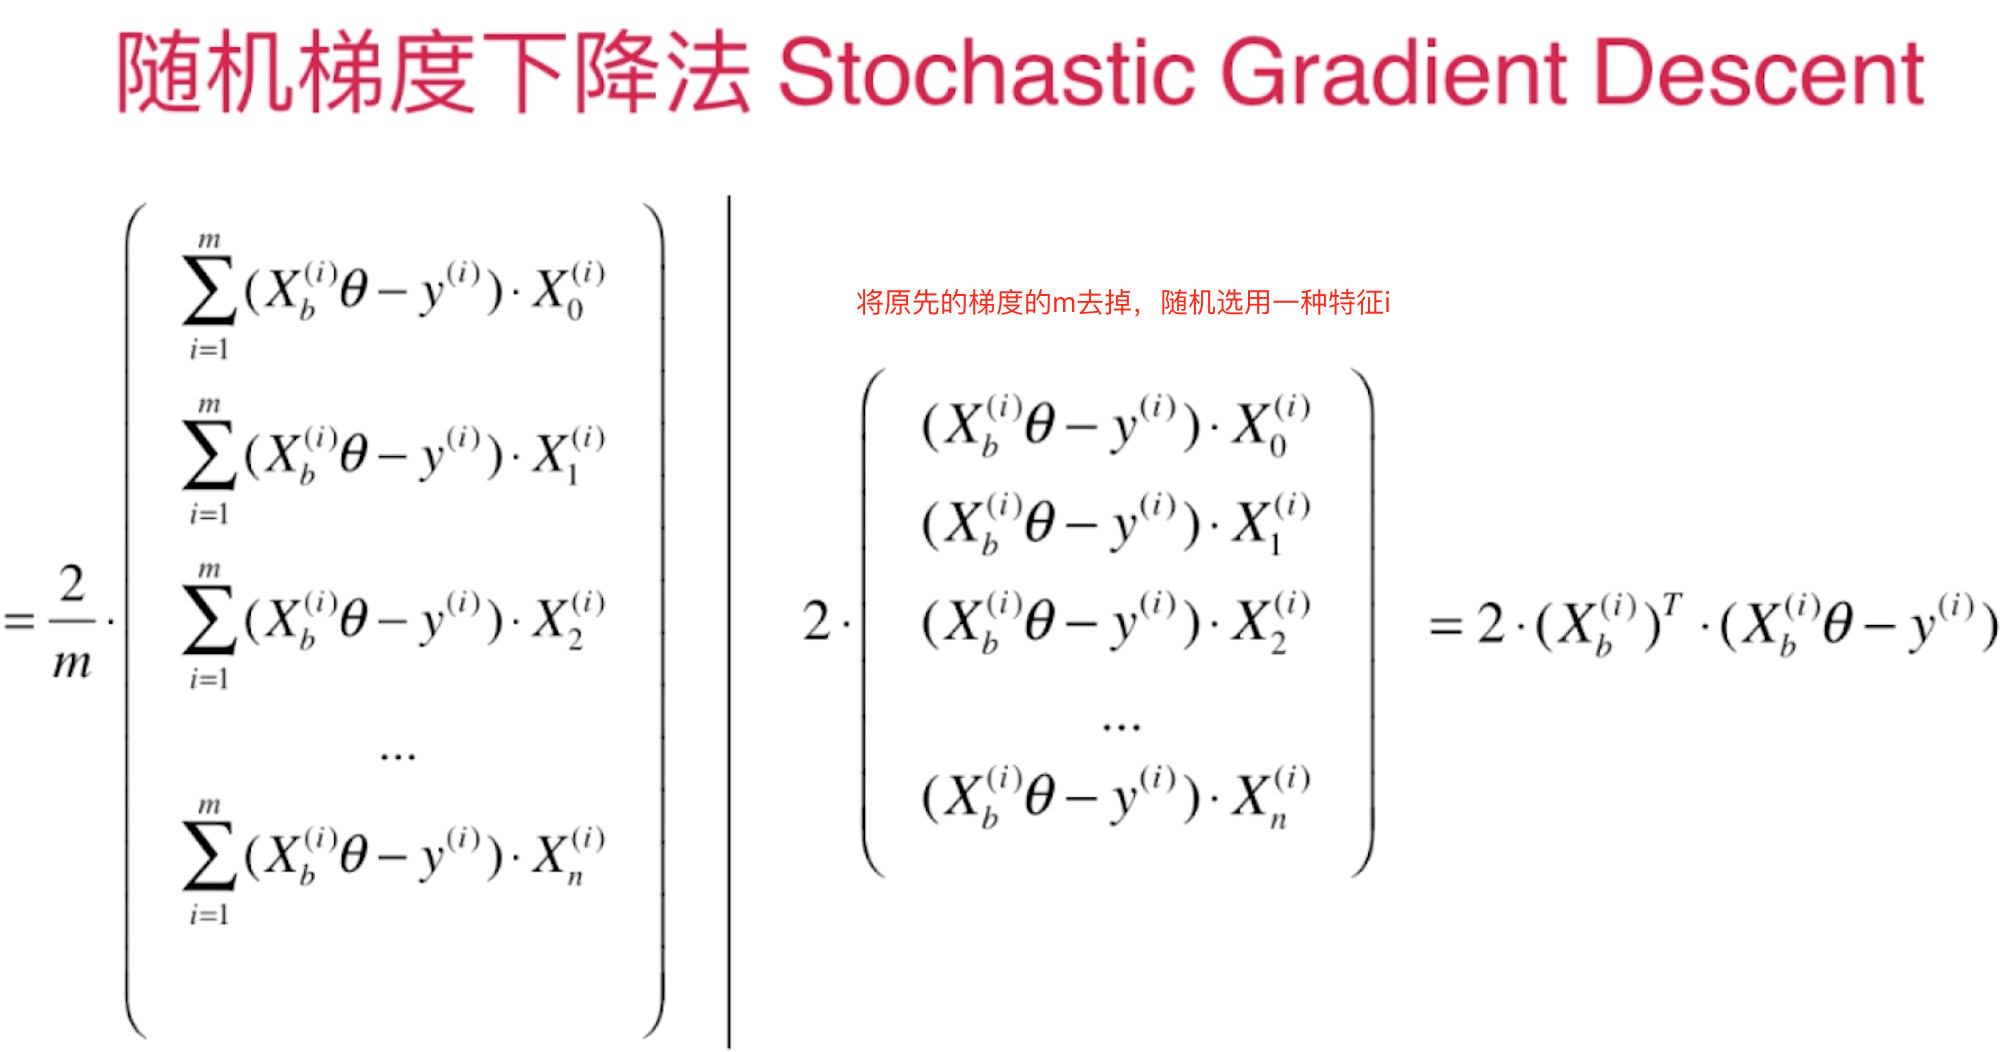

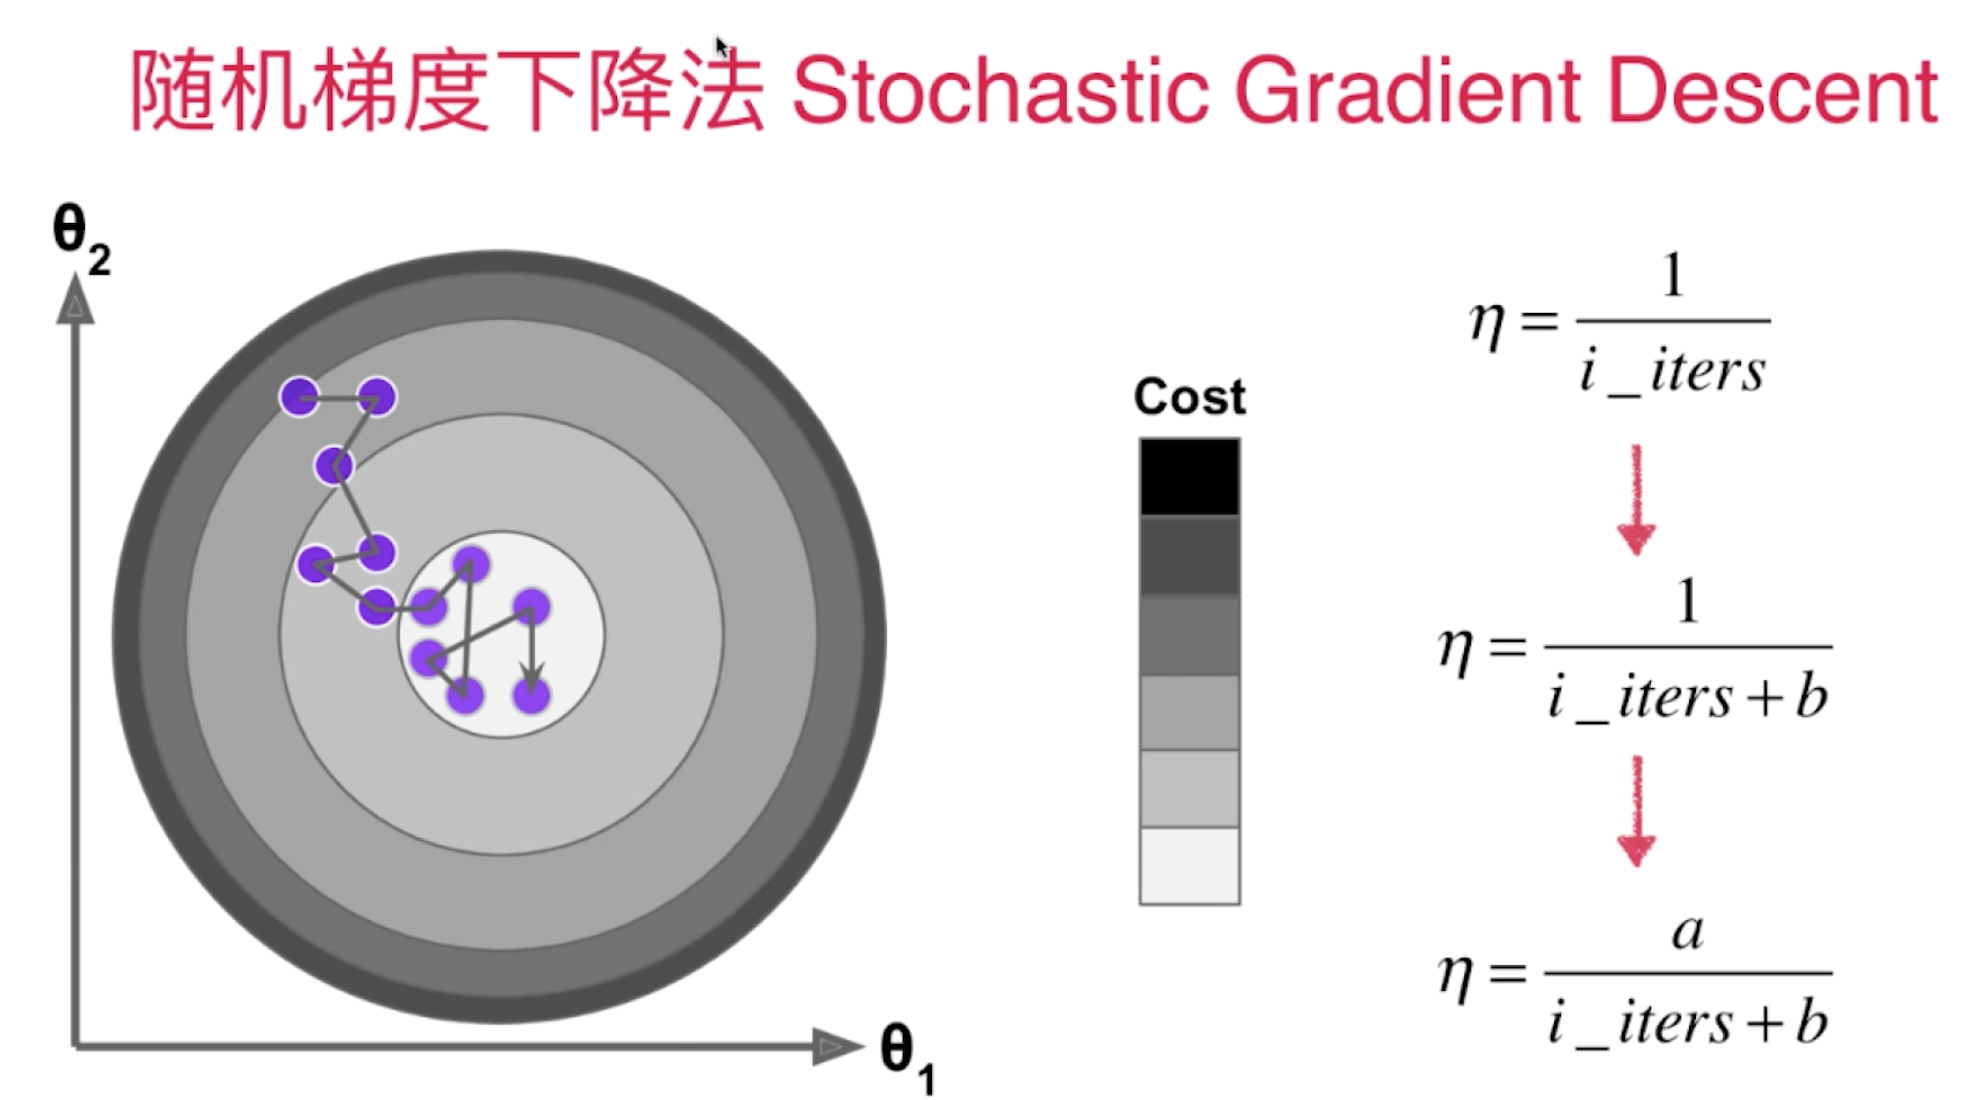

学习率的取值要求，使得一开始搜索步长大，之后步长也来越慢（所以采用运行次数倒数）
仅用倒数还不行，因为一开始变化率很大，之后很小，所以加上常数均衡一下。

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
m = 100000

x = np.random.normal(size = m)
X = x.reshape(-1,1)
y = 4. * x + 3. + np.random.normal(0., 3., size = m)

In [70]:
#批量梯度算法

def J(theta, X_b, y):       #损失函数
    try:
        return np.sum( ( y -  X_b.dot(theta) ) ** 2 ) / len(X_b)
    except:
        return float('inf')
    
def dJ(theta, X_b, y):     #损失函数的梯度（偏导）
    return X_b.T.dot(X_b.dot(theta) - y) * 2. / len(y)
#     return (2./len(X_b)) * X_b.T.dot( X_b.dot(theta) - y )

#依据梯度求最优解的过程
def gredient_descent(X_b, y, initial_theta, eta, epsilon=1e-8, n_iters = 1e4):
    theta = initial_theta
    cur_iter = 0

    while cur_iter < n_iters:      ### i_iter 执行次数，n_iter 次数上限
        gradient = dJ(theta, X_b, y)
        last_theta = theta
        theta = theta - eta * gradient

        if(abs(J(theta, X_b, y) - J(last_theta, X_b, y)) < epsilon):   #浮点数判断 == 0
            break

        cur_iter += 1

    return theta

In [71]:
%%time
X_b = np.hstack( [np.ones( (len(X), 1) ), X] )
initial_theta = np.zeros(X_b.shape[1])
eta = 0.01
theta = gredient_descent(X_b, y, initial_theta, eta)

CPU times: user 2.59 s, sys: 51.8 ms, total: 2.64 s
Wall time: 1.37 s


In [72]:
theta

array([2.98754065, 4.00944375])

### 随机梯度下降法

In [73]:
def dJ_sgd(theta, X_b_i, y_i):
    return X_b_i.T.dot(X_b_i.dot(theta) - y_i) * 2.

def sgd(X_b, y, initial_theta, n_iters = 1e4):   #不用精度判断=0，是因为随机梯度下降法的特性
    t0 = 5
    t1 = 50

    def learning_rate(t):
        return t0 / (t + t1)
    
    theta = initial_theta
    for cur_iter in range(int(n_iters)):
        rand_i = np.random.randint(len(X_b))
        gradient = dJ_sgd(theta, X_b[rand_i], y[rand_i])
        theta = theta - learning_rate(cur_iter) * gradient  # eta被学习率代替
        
    return theta

In [74]:
%%time
X_b = np.hstack( [np.ones( (len(X), 1) ), X] )
initial_theta = np.zeros(X_b.shape[1])
theta = sgd(X_b, y, initial_theta)

CPU times: user 267 ms, sys: 7.2 ms, total: 275 ms
Wall time: 276 ms


In [75]:
theta

array([2.95048122, 3.98151103])

In [ ]:
### 随机梯度快一点

### 封装

In [11]:
import numpy as np
from sklearn.metrics import r2_score

class LinearRegression:
    
    def __init__(self):
        """初始化Linear Regression"""
        self.coef_ = None            #系数,theta 1-n
        self.interception_ = None  #截距,theta 0
        self._theta = None           #theta 0-n

    def fit_normal(self, X_train, y_train):
        """根据训练数据集X_train, y_train训练Linear Regression模型"""
        assert X_train.shape[0] == y_train.shape[0], \
            "the size of X_train must be equal to the size of y_train"
        
        X_b = np.hstack( [np.ones( (len(X_train), 1) ), X_train] )      # len() 矩阵横向长度；hstack 横向维度连接
        self._theta = np.linalg.inv( X_b.T.dot(X_b) ).dot(X_b.T).dot(y_train)  #linalg.inv 逆矩阵
        
        self.interception_ = self._theta[0]
        self.coef_ = self._theta[1:]
        
        return self
    
    
    def fit_gd(self, X_train, y_train, eta=0.01, n_iters=1e4):
        """根据训练数据集X_train, y_train, 使用梯度下降法训练 Linear Regression模型"""
        assert X_train.shape[0] == y_train.shape[0], \
            "the size of X_train must be equal to the size of y_train"

        def J(theta, X_b, y): 
            """损失函数"""
            try:
                return np.sum( ( y -  X_b.dot(theta) ) ** 2 ) / len(X_b)
            except:
                return float('inf')

        def dJ(theta, X_b, y): 
            """损失函数的梯度（偏导）, 向量化"""
            return X_b.T.dot(X_b.dot(theta) - y) * 2. / len(y)

        def gredient_descent(X_b, y, initial_theta, eta, epsilon=1e-8, n_iters = 1e4):
            """依据梯度搜索的过程"""
            theta = initial_theta
            cur_iter = 0
            while cur_iter < n_iters:      ### i_iter 执行次数，n_iter 次数上限
                gradient = dJ(theta, X_b, y)
                last_theta = theta
                theta = theta - eta * gradient
                if(abs(J(theta, X_b, y) - J(last_theta, X_b, y)) < epsilon):   #浮点数判断 == 0
                    break
                cur_iter += 1
            return theta

        X_b = np.hstack( [np.ones((len(X_train), 1)), X_train] )    # np.ones((3,5))传进去的是元组，3行5列的1矩阵；或者np.ones(10)
        initial_theta = np.zeros( X_b.shape[1] )
        self._theta = gredient_descent(X_b, y_train, initial_theta, eta)
        self.interception_ = self._theta[0]
        self.coef_ = self._theta[1:]
        return self
    
    def fit_sgd(self, X_train, y_train, n_iters=5, t0=5, t1=50):   # n_iters样本扫描几轮！
        """根据训练数据集X_train, X_test, y_train, y_test, 使用梯度下降法训练Linear Regression模型"""
        assert X_train.shape[0] == y_train.shape[0], \
            "the size of X_train must be equal to the size of y_train"
        assert n_iters >= 1, \
            "n_iters 应大于等于 1"
        def dJ_sgd(theta, X_b_i, y_i):
            return X_b_i.T.dot(X_b_i.dot(theta) - y_i) * 2.

        def sgd(X_b, y, initial_theta, n_iters=1e4, t0=5, t1=50):   #不用精度判断=0，是因为随机梯度下降法的特性
            def learning_rate(t):
                return t0 / (t + t1)
            theta = initial_theta
            m = len(X_b)
            
            
            for cur_iter in range(int(n_iters)):
                indexes = np.random.permutation(m)   #0 - m-1 索引随机排列
                X_b_new = X_b[indexes]
                y_new = y[indexes]
                for i in range(m):
                    gradient = dJ_sgd(theta, X_b[i], y[i])
                    theta = theta - learning_rate(cur_iter * m + i) * gradient  # eta被学习率代替
            return theta  
        
        X_b = np.hstack( [np.ones((len(X_train), 1)), X_train] )
        initial_theta = np.random.randn(X_b.shape[1])       # random.normal可以指定均值方差，randn只能是标准化
        self._theta = sgd(X_b, y_train, initial_theta, n_iters, t0, t1)
        self.interception_ = self._theta[0]
        self.coef_ = self._theta[1:]
    
    def predict(self, X_predict):
        """给定待预测数据集X_predict, 返回X_predict的结果向量"""
        assert self.interception_ is not None and self.coef_ is not None, \
            "must fit before predict !"
        assert X_predict.shape[1] == len(self.coef_), \
            "the feature number of X_predict must be equal to X_train"
        
        X_b = np.hstack( [np.ones( (len(X_predict), 1) ), X_predict] )
        return X_b.dot(self._theta)
    
    
    
    def score(self, X_test, y_test):
        """根据测试数据集X_test 和 y_test确定当前模型的准确度"""
        y_predict = self.predict(X_test)
        return r2_score(y_test, y_predict)
    
    def __repr__(self):
        return "LinearRegression()"

In [4]:
### 使用真实的数据测试

from sklearn import datasets
boston = datasets.load_boston()
X = boston.data
y = boston.target

X = X[y < 50.0]
y = y[y < 50.0]

In [6]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=666)

In [9]:
from sklearn.preprocessing import StandardScaler

standardScaler = StandardScaler()
standardScaler.fit(X_train)
X_train_standard = standardScaler.transform(X_train)
X_test_standard = standardScaler.transform(X_test)

In [12]:
#搜索2轮

lin_reg = LinearRegression()
%time lin_reg.fit_sgd(X_train_standard, y_train, n_iters=2)
lin_reg.score(X_test_standard, y_test)

CPU times: user 8.96 ms, sys: 2.52 ms, total: 11.5 ms
Wall time: 13.2 ms


0.5794477332738274

In [13]:
#搜索50轮

lin_reg = LinearRegression()
%time lin_reg.fit_sgd(X_train_standard, y_train, n_iters=50)
lin_reg.score(X_test_standard, y_test)

CPU times: user 198 ms, sys: 5.1 ms, total: 203 ms
Wall time: 214 ms


0.8013682711354262

In [14]:
#搜索100轮

lin_reg = LinearRegression()
%time lin_reg.fit_sgd(X_train_standard, y_train, n_iters=100)
lin_reg.score(X_test_standard, y_test)

CPU times: user 531 ms, sys: 14.9 ms, total: 546 ms
Wall time: 791 ms


0.8012337462159479